# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_data["Mouse ID"].unique())]
print(cleaned_data)
print(len(cleaned_data))

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count = (cleaned_data["Mouse ID"]).nunique()
mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": grouped_data["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": grouped_data["Tumor Volume (mm3)"].median(),
    "Variance Tumor Volume": grouped_data["Tumor Volume (mm3)"].var(),
    "Standard Deviation Tumor Volume": grouped_data["Tumor Volume (mm3)"].std(),
    "SEM Tumor Volume": grouped_data["Tumor Volume (mm3)"].sem()
})
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Variance Tumor Volume",
    "Standard Deviation Tumor Volume",
    "SEM Tumor Volume"
]

summary_stats_advanced


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

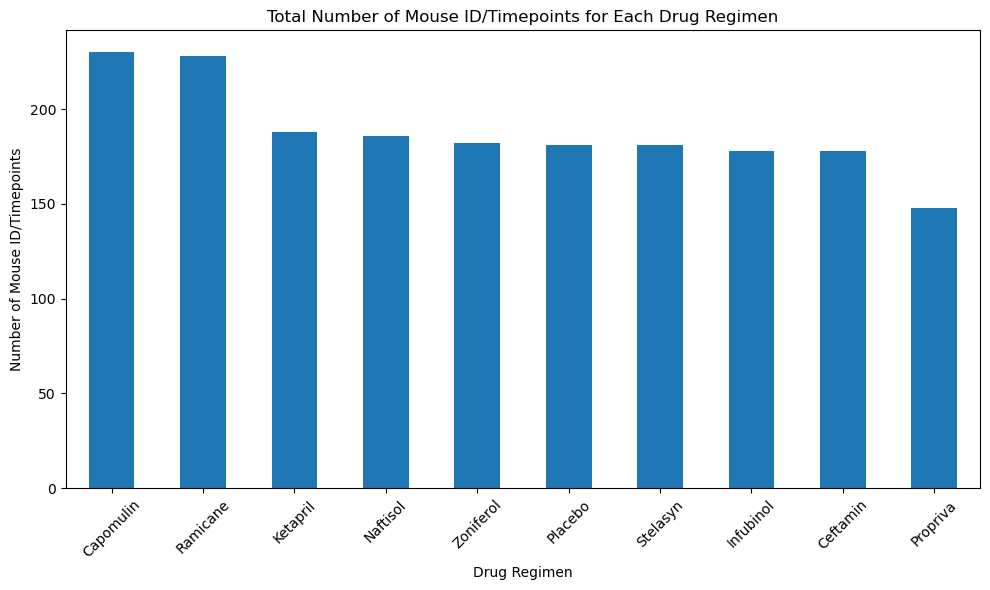

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", figsize=(10, 6))

# labels and title
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

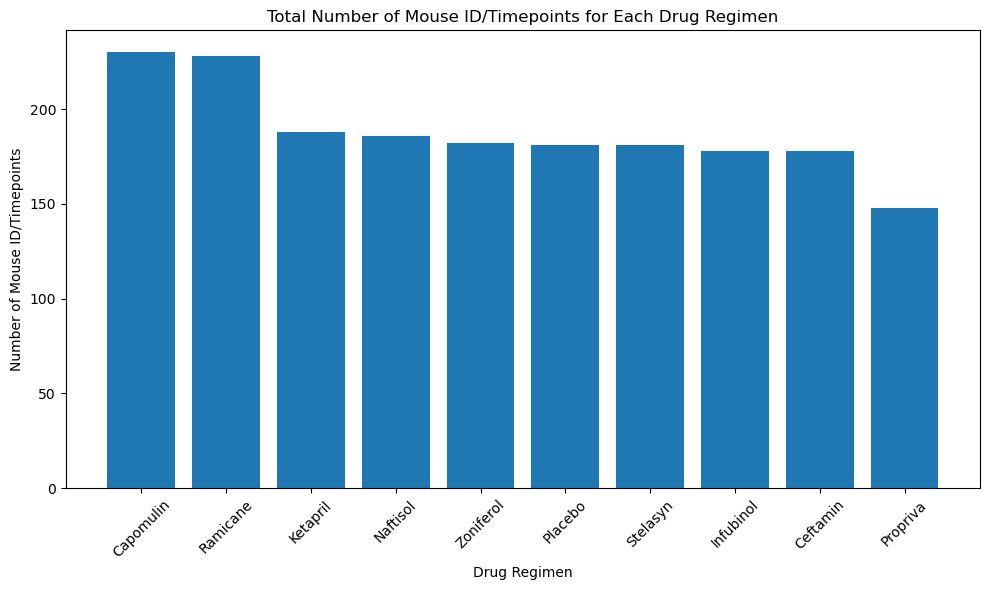

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

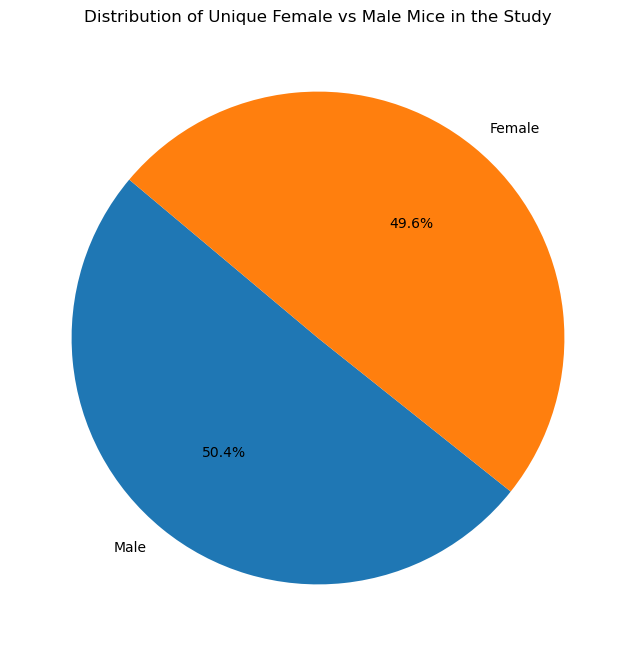

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")
gender_counts = unique_mice["Sex"].value_counts()


# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), startangle=140)
plt.title("Distribution of Unique Female vs Male Mice in the Study")
plt.ylabel("")  # Removes default y-axis label for better aesthetics
plt.show()

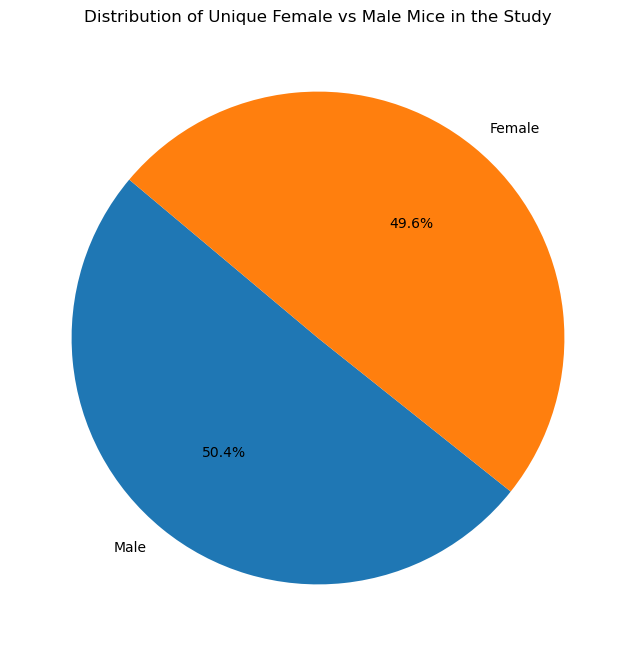

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset="Mouse ID")
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts.values, 
    labels=gender_counts.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=["#1f77b4", "#ff7f0e"]  # Optional custom colors
)
plt.title("Distribution of Unique Female vs Male Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_data = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_filtered = merged_data[
    merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
]
treatment_filtered.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = treatment_filtered.loc[treatment_filtered["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_volumes.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"{treatment} Treatment:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Potential outliers: {outliers}\n")


Capomulin Treatment:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane Treatment:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol Treatment:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin Treatment:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/2d/61cgq1_16g18f_lk6zp5y1dw0000gn/T/ipykernel_37599/1820122924.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True)


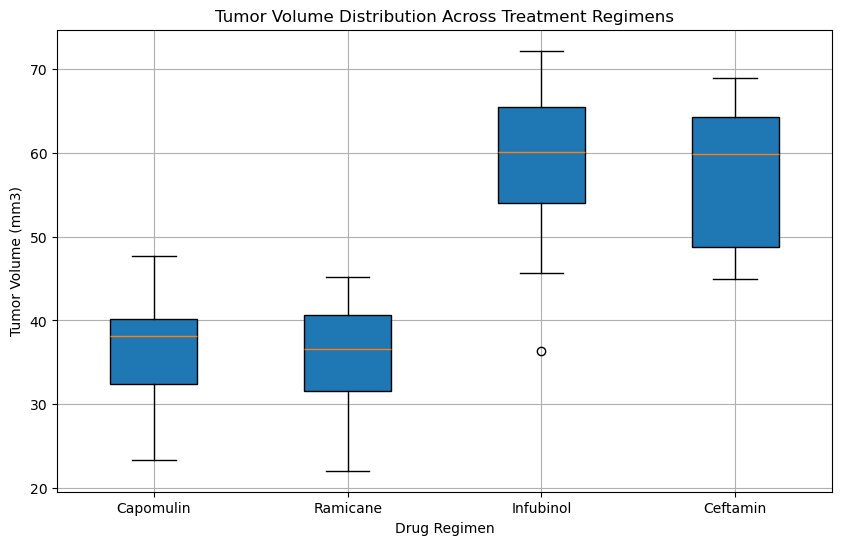

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True)

plt.title("Tumor Volume Distribution Across Treatment Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()


## Line and Scatter Plots

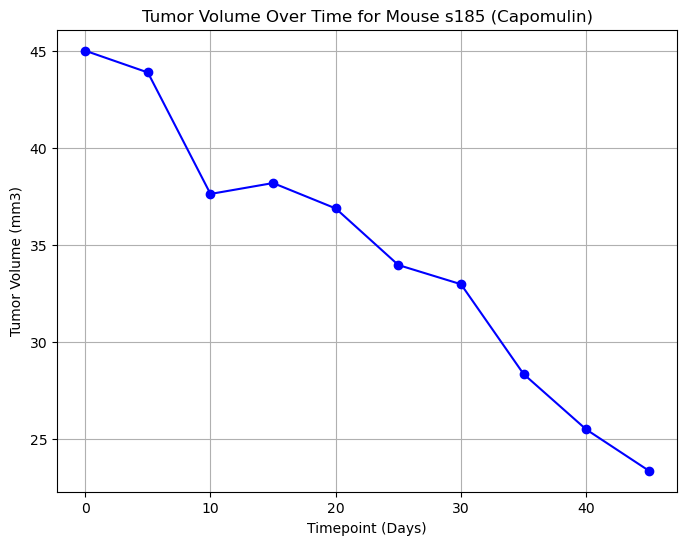

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", "Mouse ID"].iloc[0]

mouse_data = cleaned_data.loc[cleaned_data["Mouse ID"] == single_mouse_id]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", linestyle="-", color="b")

plt.title(f"Tumor Volume Over Time for Mouse {single_mouse_id} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()


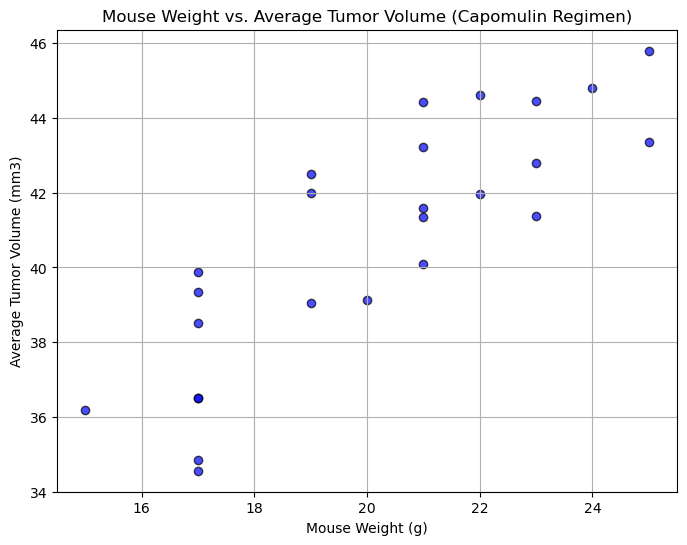

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color="b", alpha=0.7, edgecolors="black")

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()


## Correlation and Regression

Correlation Coefficient: 0.84


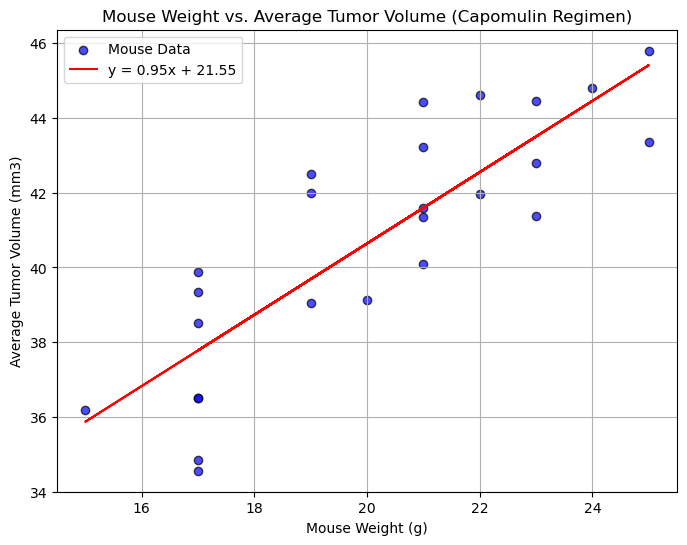

Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 0.0000
Standard Error: 0.13


In [21]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation = avg_tumor_volume.corr(mouse_weight)
print(f"Correlation Coefficient: {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

regression_values = slope * mouse_weight + intercept

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color="b", alpha=0.7, edgecolors="black", label="Mouse Data")
plt.plot(mouse_weight, regression_values, color="r", label=f"y = {slope:.2f}x + {intercept:.2f}")

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)

plt.show()

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.2f}")
